### **0. Set-up**

In [2]:
# Import libraries and utils
%run "utils.ipynb"

In [3]:
# Load predicted
raw_predicted = pd.read_csv("F:/work_study/ILLC/S3B1/LLM project/implementation/doubao/f1.csv")

# Load actual
raw_actual = pd.read_csv("F:\work_study\ILLC\S3B1\LLM project\implementation\sampled_avg_multisimlex_CN.csv")

In [4]:
# Show results
raw_predicted

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,长,狭窄,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,内疚,羞愧,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2,暴力,被动,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,闷,平庸,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,害羞,昂贵,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,离开,走开,5,5,6,6,5,5,6,6,5,5,6,5,5,5,6
468,读,理解,3,3,2,2,3,3,2,2,3,3,2,3,3,3,2
469,装作,想像,3,3,2,2,3,3,2,4,2,3,4,3,3,3,2
470,跟随,追逐,3,3,2,4,3,3,2,4,2,3,4,3,3,3,2


### **1. Data Quality**

In [6]:
# Basic info
raw_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   word1                472 non-null    object
 1   word2                472 non-null    object
 2   similarity_score_1   472 non-null    int64 
 3   similarity_score_2   472 non-null    int64 
 4   similarity_score_3   472 non-null    int64 
 5   similarity_score_4   472 non-null    int64 
 6   similarity_score_5   472 non-null    int64 
 7   similarity_score_6   472 non-null    int64 
 8   similarity_score_7   472 non-null    int64 
 9   similarity_score_8   472 non-null    int64 
 10  similarity_score_9   472 non-null    int64 
 11  similarity_score_10  472 non-null    int64 
 12  similarity_score_11  472 non-null    int64 
 13  similarity_score_12  472 non-null    int64 
 14  similarity_score_13  472 non-null    int64 
 15  similarity_score_14  472 non-null    int64 
 16  similari

In [7]:
# Missing values per column
raw_predicted.isnull().sum()

word1                  0
word2                  0
similarity_score_1     0
similarity_score_2     0
similarity_score_3     0
similarity_score_4     0
similarity_score_5     0
similarity_score_6     0
similarity_score_7     0
similarity_score_8     0
similarity_score_9     0
similarity_score_10    0
similarity_score_11    0
similarity_score_12    0
similarity_score_13    0
similarity_score_14    0
similarity_score_15    0
dtype: int64

In [8]:
# Select word pairs and copy
wordpairs_predicted = raw_predicted[['word1', 'word2']].copy()
wordpairs_actual = raw_actual[['word1', 'word2']].copy()

# Remove whitespace
wordpairs_actual['word1'] = wordpairs_actual['word1'].replace(" ", "", regex=True)
wordpairs_actual['word2'] = wordpairs_actual['word2'].replace(" ", "", regex=True)

# Check if actual is identical to predicted
are_identical = wordpairs_actual.equals(wordpairs_predicted)
print("Word pairs in Actual are identical to Predicted:", are_identical)

# If not identical, show the differences
differences = None
if not are_identical:
    differences = wordpairs_actual.compare(wordpairs_predicted)
    differences.columns = ['Word1 Actual', 'Word1 Predicted']

# Show results
differences if differences is not None else print("No differences found")

Word pairs in Actual are identical to Predicted: True
No differences found


### **2. Data Processing**

In [10]:
# Copy dataframe
predicted = raw_predicted.copy()

# List of columns to calculate mean MultiSimlex_CN
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean MultiSimlex_CN
predicted['pred_sl'] = predicted[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation MultiSimlex_CN
predicted['pred_sd'] = predicted[similarity_cols].std(axis=1).round(2)

# Select columns
predicted = predicted[['word1', 'word2', 'pred_sl', 'pred_sd']]

# Show results
predicted

,word1,word2,pred_sl,pred_sd
0,长,狭窄,0.00,0.00
1,内疚,羞愧,6.00,0.00
2,暴力,被动,0.00,0.00
3,闷,平庸,0.00,0.00
4,害羞,昂贵,0.00,0.00
...,...,...,...,...
467,离开,走开,5.40,0.51
468,读,理解,2.60,0.51
469,装作,想像,2.80,0.68
470,跟随,追逐,2.93,0.70


In [11]:
# Copy dataframe
actual = raw_actual.copy()

# List of columns to calculate prediction mean
annotation_cols = [f"Annotator {i}" for i in range(1, 11)]

# Calculate the prediction mean
actual['act_sl'] = actual['avg_anno']

# Calculate the prediction standard deviation
actual['act_sd'] = actual[annotation_cols].std(axis=1).round(2)

actual = actual[['word1', 'word2', 'act_sl', 'act_sd']]

# Show results
actual

,word1,word2,act_sl,act_sd
0,长,狭窄,0.27,0.32
1,内疚,羞愧,4.36,1.34
2,暴力,被动,0.00,0.00
3,闷,平庸,0.91,1.14
4,害羞,昂贵,0.00,0.00
...,...,...,...,...
467,离开,走开,4.09,1.32
468,读,理解,0.64,1.26
469,装作,想像,0.18,0.63
470,跟随,追逐,2.82,1.56


In [12]:
# Merge predicted and actual DataFrames
merged = pd.merge(predicted, actual, on=['word1', 'word2'])

# Show results
merged

,word1,word2,pred_sl,pred_sd,act_sl,act_sd
0,长,狭窄,0.00,0.00,0.27,0.32
1,内疚,羞愧,6.00,0.00,4.36,1.34
2,暴力,被动,0.00,0.00,0.00,0.00
3,闷,平庸,0.00,0.00,0.91,1.14
4,害羞,昂贵,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
467,离开,走开,5.40,0.51,4.09,1.32
468,读,理解,2.60,0.51,0.64,1.26
469,装作,想像,2.80,0.68,0.18,0.63
470,跟随,追逐,2.93,0.70,2.82,1.56


In [13]:
merged['pred_act_gap']=merged['pred_sl']-merged['act_sl']
merged.to_csv('f1_diff.csv')

### **3. Descriptive Statistics**

In [15]:
# Summary statistics MultiSimlex_CN
pred_sl_summary = round(predicted['pred_sl'].describe(), 2)
act_sl_summary = round(actual['act_sl'].describe(), 2)

# Add median MultiSimlex_CN
pred_sl_summary['median'] = round(predicted['pred_sl'].median(), 2)
act_sl_summary['median'] = round(actual['act_sl'].median(), 2)

# Summary statistics standard deviations
pred_sd_summary = round(predicted['pred_sd'].describe(), 2)
act_sd_summary = round(actual['act_sd'].describe(), 2)

# Add median standard deviation
pred_sd_summary['median'] = round(predicted['pred_sd'].median(), 2)
act_sd_summary['median'] = round(actual['act_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "pred_sl": pred_sl_summary,
    "act_sl": act_sl_summary,
    "pred_sd": pred_sd_summary,
    "act_sd": act_sd_summary
})

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,472.00,472.00,472.00,472.00
mean,1.86,1.48,0.31,0.97
std,1.93,1.52,0.44,0.62
min,0.00,0.00,0.00,0.00
25%,0.00,0.18,0.00,0.42
50%,1.87,0.73,0.00,1.03
75%,3.47,2.66,0.58,1.49
max,6.00,5.64,2.58,2.37
median,1.87,0.73,0.00,1.03


#### **3.1. MultiSimlex_CN**

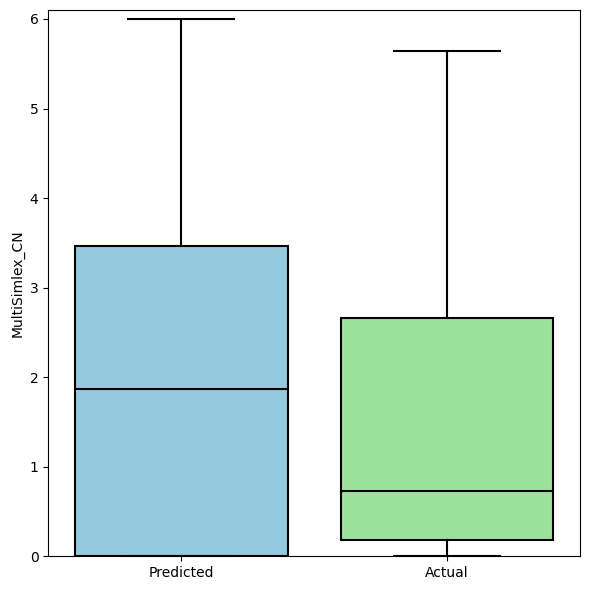

In [17]:
# Rename columns and copy
renamed_pred_sl = predicted.rename(columns={"pred_sl": "MultiSimlex_CN"}).copy()
renamed_act_sl = actual.rename(columns={"act_sl": "MultiSimlex_CN"}).copy()

# Create dummy label
renamed_pred_sl['Score'] = 'Predicted'
renamed_act_sl['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_pred_sl, renamed_act_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='MultiSimlex_CN',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('MultiSimlex_CN')
# plt.title('Comparison of MultiSimlex_CN')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 6.1)  # Setting y-axis limits from 0 to 6

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()
plt.savefig("f1sim.png")

# Show results
plt.show()

#### **3.2. Standard Deviation**

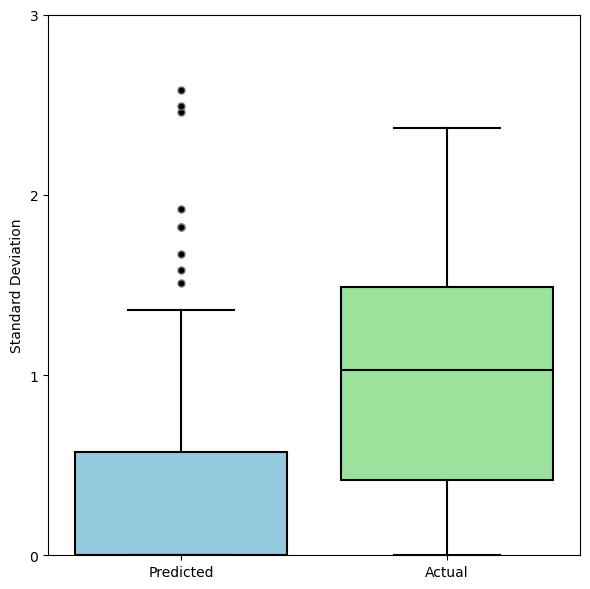

In [19]:
# Rename columns and copy
renamed_predicted_sd = predicted.rename(columns={"pred_sd": "Standard Deviation"}).copy()
renamed_actual_sd = actual.rename(columns={"act_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_predicted_sd['Score'] = 'Predicted'
renamed_actual_sd['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_predicted_sd, renamed_actual_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 3)  # Setting y-axis limits from 0 to 3

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()
plt.savefig("f1sd.png")
# Show results
plt.show()

### **4. Distributions**

#### **4.1. MultiSimlex_CN**

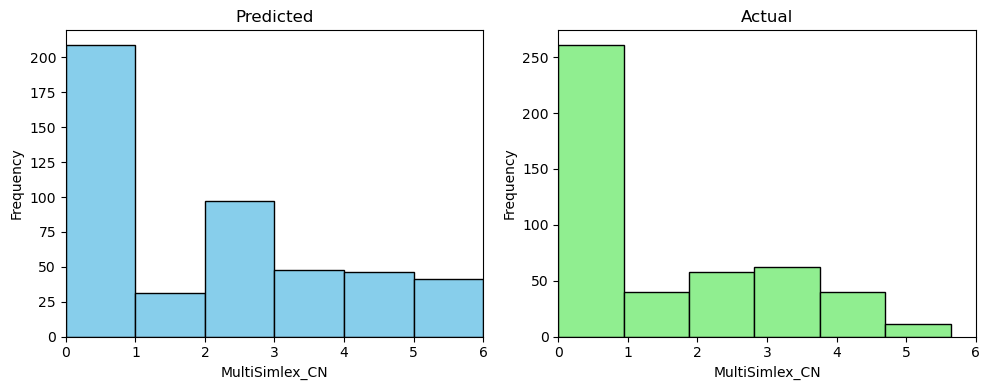

In [27]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 6

# Define bins
bins = 6

# Plot predicted histogram
axes[0].hist(renamed_pred_sl['MultiSimlex_CN'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('MultiSimlex_CN')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_act_sl['MultiSimlex_CN'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('MultiSimlex_CN')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **4.2. Standard Deviation**

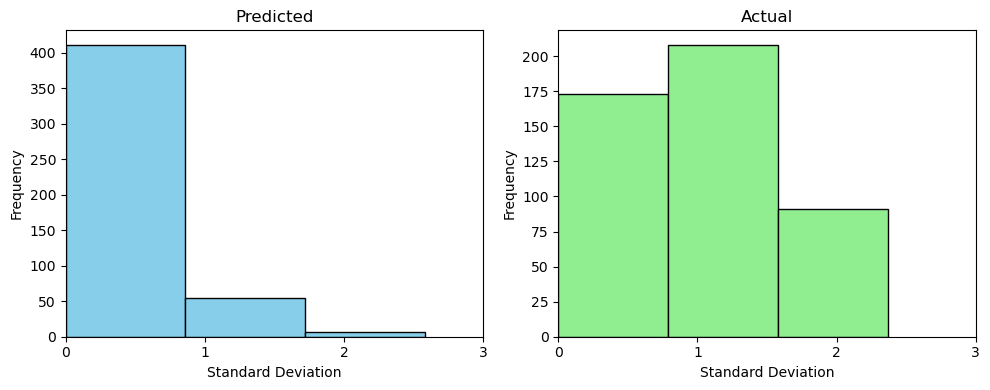

In [29]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 3

# Define bins
bins = 3

# Plot predicted histogram
axes[0].hist(renamed_predicted_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_actual_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **5. Outliers**

#### **5.1. Predicted**

In [32]:
# Count outliers
print_outlier_counts(predicted)

Outliers in pred_sd: 9
No outliers found in columns: pred_sl


In [33]:
# Row outliers
print_outlier_data(predicted, 'pred_sd')


Outliers in pred_sd:
    word1   word2  pred_sl  pred_sd
9      坚硬     密度大     1.13     1.51
10    无实体      心灵     2.93     1.58
29     婚外  不可說出口的     2.73     2.46
226     米       码     2.53     1.92
350   分界线      国境     1.07     1.67
351     书      正文     1.20     1.82
353    优雅      风格     1.20     1.82
354     星      明亮     2.27     2.49
356    掩盖      保护     2.67     2.58


#### **5.2. Actual**

In [35]:
# Count outliers
print_outlier_counts(actual)

No outliers found in columns: act_sl, act_sd


In [36]:
# Row outliers
print_outlier_data(actual, 'act_sd')

No outliers found in act_sd


#### **5.3. Add to Summary**

In [38]:
# Calculate outliers
outliers_pred_sl = calculate_outliers(predicted, 'pred_sl')
outliers_pred_sd = calculate_outliers(predicted, 'pred_sd')
outliers_act_sl = calculate_outliers(actual, 'act_sl')
outliers_act_sd = calculate_outliers(actual, 'act_sd')

# Count outliers
count_outliers_pred_sl = outliers_pred_sl.shape[0]
count_outliers_pred_sd = outliers_pred_sd.shape[0]
count_outliers_act_sl = outliers_act_sl.shape[0]
count_outliers_act_sd = outliers_act_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_pred_sl, count_outliers_act_sl, count_outliers_pred_sd, count_outliers_act_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,472.00,472.00,472.00,472.00
mean,1.86,1.48,0.31,0.97
std,1.93,1.52,0.44,0.62
min,0.00,0.00,0.00,0.00
25%,0.00,0.18,0.00,0.42
50%,1.87,0.73,0.00,1.03
75%,3.47,2.66,0.58,1.49
max,6.00,5.64,2.58,2.37
median,1.87,0.73,0.00,1.03
outliers,0.00,0.00,9.00,0.00


### **6. Correlation**

#### **6.1. MultiSimlex_CN vs Standard Deviation**

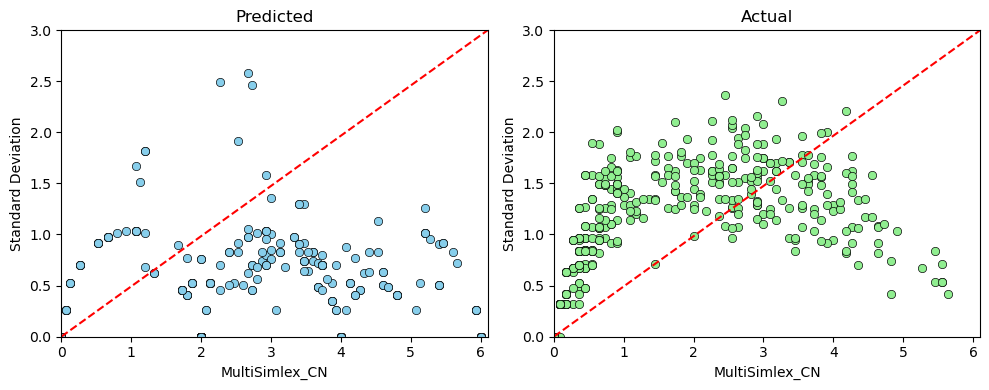

In [41]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 6.1
y_min = 0
y_max = 3.0

# Create scatter plot
sns.scatterplot(x='pred_sl', y='pred_sd', data=predicted, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('MultiSimlex_CN')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('Predicted')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='act_sl', y='act_sd', data=actual, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('MultiSimlex_CN')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('Actual')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [42]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(merged, 'pred_sl', 'pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(merged, 'act_sl', 'act_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,pred_sl,pred_sd,0.50003,3.160363e-31,significant
1,act_sl,act_sd,0.75989,5.903927e-90,significant


### **7. Evaluation Metrics**

#### **7.1. Spearmans's Rank Correlation**

##### **7.1.1. Actual MultiSimlex_CN vs Predicted MultiSimlex_CN**

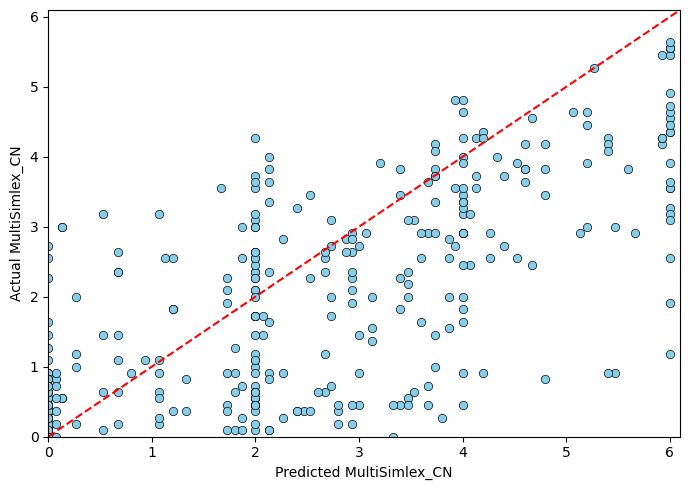

In [46]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sl', 'act_sl', 'Predicted MultiSimlex_CN', 'Actual MultiSimlex_CN', 0, 6.1, 0, 6.1)

In [47]:
# Correlation and pvalue
print_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Spearman's Rank correlation: 0.80269
P-value: 1.445327859725532e-107
The correlation is statistically significant.



In [48]:
print_tau_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Kendall’s Tau correlation: 0.64046
P-value: 8.220610129854886e-82
The correlation is statistically significant.



In [49]:
print_distance_correlation_and_pvalue(merged, 'pred_sl', 'act_sl',random_state=42)

Distance Correlation: 0.75678
P-value: 0.000999000999000999
The correlation is statistically significant.



C:\Users\38155\AppData\Local\Temp\ipykernel_25540\692413257.py:19: DeprecationWarning: Attribute "p_value" deprecated, use "pvalue" instead.
  ).p_value


(0.7567750531584104, 0.000999000999000999)

In [93]:
print_pearson_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Pearson's correlation: 0.78656
P-value: 1.8677562115908355e-100
The correlation is statistically significant.



##### **7.1.2. Actual Standard Deviation vs Predicted Standard Deviation**

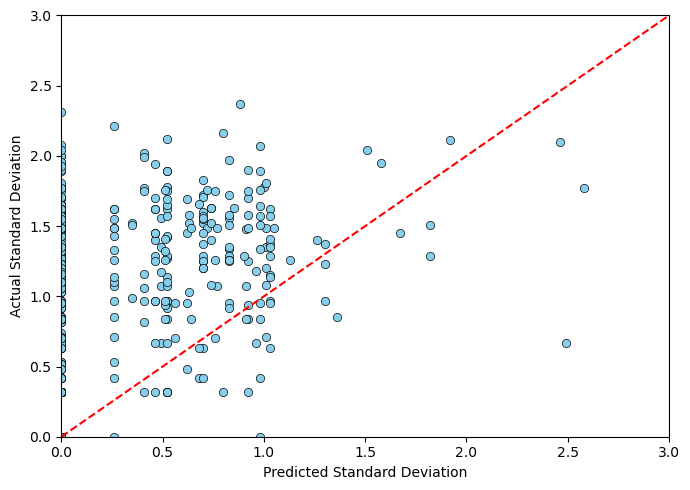

In [51]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sd', 'act_sd', 'Predicted Standard Deviation', 'Actual Standard Deviation', 0, 3, 0, 3)

In [52]:
# Correlation and p-value
print_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Spearman's Rank correlation: 0.41558
P-value: 3.9150778383354e-21
The correlation is statistically significant.



In [53]:
print_tau_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Kendall’s Tau correlation: 0.31595
P-value: 9.700605465890225e-20
The correlation is statistically significant.



In [54]:
print_distance_correlation_and_pvalue(merged, 'pred_sd', 'act_sd',random_state=42)

Distance Correlation: 0.42001
P-value: 0.000999000999000999
The correlation is statistically significant.



C:\Users\38155\AppData\Local\Temp\ipykernel_25540\692413257.py:19: DeprecationWarning: Attribute "p_value" deprecated, use "pvalue" instead.
  ).p_value


(0.4200127761613489, 0.000999000999000999)

In [55]:
print_pearson_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Pearson's correlation: 0.39644
P-value: 3.250005699451952e-19
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [57]:
# Calculate Mean Squared Error
mse = mean_squared_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1.56


#### **7.3. Mean Absolute Error (MAE)**

In [59]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.85
